За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

\begin{equation}  \normalsize
I_f,_{filt} = HI_f 
\end{equation}

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

\begin{equation} \normalsize
H(i,j) = e^ {-\frac{d(i,j)^2}{f^2_h}} \Bigg(1 - e^ {-\frac{d(i,j)^2}{f^2_l}} \Bigg)
\end{equation}
Каде што $𝑑(𝑖,𝑗)$ е евклидовото растојанието на даден пиксел од центарот на сликата, додека $𝑓ℎ$ и $𝑓𝑙$ се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме.

Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

\begin{equation} \normalsize
F(u,v) = \iint^{\infty}_{-\infty} f(x,y)e^ {-i2\pi(ux+vy)} \, dxdy
\end{equation}

А во дискретниот домен горната равенка може да биде преведена како

\begin{equation} \normalsize
F(u,v) = \sum^{\infty}_{m=-\infty} \sum^{\infty}_{n=-\infty} f[m,n] \cdot e^ {-i2\pi(umx_0 + cny_0)}
\end{equation}

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

\begin{equation} \normalsize
f(x,y) = \iint^{\infty}_{-\infty} F(u,v)e^ {i2\pi(ux+vy)} \, dudv
\end{equation}

А во дискретниот домен горната равенка може да биде преведена како

\begin{equation} \normalsize
f(x,y) = \sum^{\infty}_{m=-\infty} \sum^{\infty}_{n=-\infty} F(m,n) \cdot e^ {i2\pi(xmu_0 + ynv_0)}
\end{equation}


In [29]:
from pylab import *
from skimage import img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import io

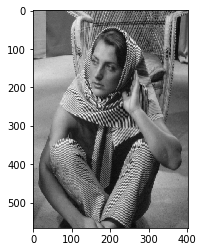

In [38]:
imdata=imread('Barbara.tif');
#figure(1); imshow(imdata); #title('Original image');

imdata=rgb2gray(imdata);
figure(2); imshow(imdata, cmap='gray'); #title('Gray image');

F=fft2(imdata);
S=abs(F);
#figure(1); imshow(S,[]);
